<a href="https://colab.research.google.com/github/MridulaRPanicker/ICT_Python_Assignments/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

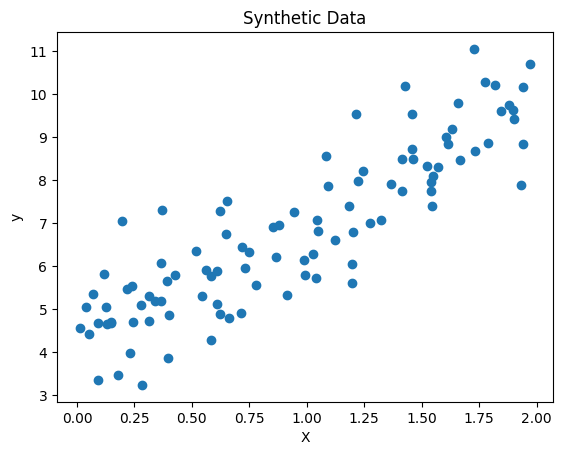

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [3]:
from sklearn.model_selection import train_test_split # Importing the sklearn library to do the Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42) # Splitting the synthetic data as Training set and Testing set

## Do the Linear Regression with Scikit-Learn Library

In [4]:
from sklearn.linear_model import LinearRegression # Importing the Linear Regression model
from sklearn.metrics import r2_score,mean_absolute_percentage_error # Importing necessary metrics from the library

lr = LinearRegression() # Initialized the Linear Regression model
lr.fit(X_train,y_train)  # The model learns about the data using Training dataset
y_pred_lr = lr.predict(X_test)  # Once the model trained with training data, now it is predicting using the unseen Test dataset


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [5]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso

# Performing Lasso Regression and producing the metrics to see the performance
lasso_model = Lasso(alpha = 0.1)
lasso_model = lasso_model.fit(X_train,y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Performing Ridge Regression and producing the metrics to see the performance
ridge_model = Ridge(alpha = 0.1)
ridge_model = ridge_model.fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)


# Creating a list of dictionaries with all the results and then converting it to a dataframe for readability
results = [
    {
        "Model    ": "Linear Regression",
        "R2 score": round(r2_score(y_test,y_pred_lr),4),
        "MAPE": f"{(mean_absolute_percentage_error(y_test,y_pred_lr)):.2%}"
    },
    {
        "Model    ": "Lasso Regression",
        "R2 score": round(r2_score(y_test,y_pred_lasso),4),
        "MAPE": f"{(mean_absolute_percentage_error(y_test,y_pred_lasso)):.2%}"
    },
    {
        "Model    ": "Ridge Regression",
        "R2 score": round(r2_score(y_test,y_pred_ridge),4),
        "MAPE": f"{(mean_absolute_percentage_error(y_test,y_pred_ridge)):.2%}"
    }
]

result_table = pd.DataFrame(results)
print(result_table)

           Model      R2 score   MAPE
0  Linear Regression    0.8311  8.48%
1   Lasso Regression    0.8091  8.26%
2   Ridge Regression    0.8307  8.45%


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

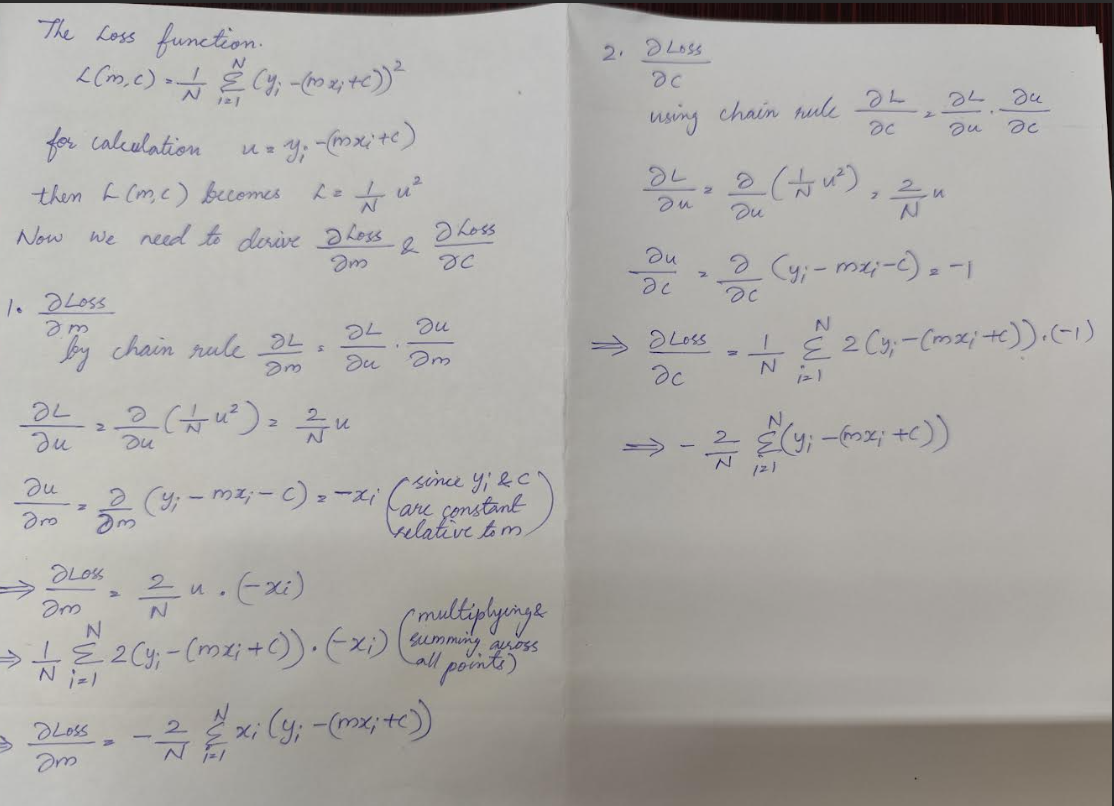

## 🧠 Custom Linear Regression Class

In [22]:

class MyLinearRegression:
    def __init__(self): # Initializing slope and intercept as None.
       self.m = 0    # We are starting not set when the object first created.
       self.c = 0
       self.coef_ = None
       self.intercept_ = None
       self.loss_data = [] # this is to store the loss at every iteration.

    def fit(self, X, y, lr=0.01, n_iters=1000):
        num_samples = len(y) # defining N from derivation and it is set as len(y)
        self.m = 0  # Initializing the parameters, starting from 0
        self.c = 0

        self.loss_data = []

        for _ in range(n_iters):  # Gradient Descent Loop
            y_cap = (self.m * X) + self.c       # Calculate current predictions

            stage_loss = np.mean((y-y_cap)**2)
            self.loss_data.append(stage_loss)

            dm = (-2 / num_samples) * np.sum(X * (y - y_cap)) # slope derivative based on the derivation

            dc = (-2 / num_samples) * np.sum(y - y_cap)  # constant derivative based on the derivation


            self.m -= (lr * dm)  # updated parameters
            self.c -= (lr * dc)

        self.coef_ = round(self.m,3)      # updating the coef_ and intercept_ to see what the learned slope and intercpet are.
        self.intercept_ = round(self.c,3)


    def predict(self, X):
         return (self.m * X) + self.c  # using the formula y = mx+c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
      self.fit(X, y, lr, n_iters)  # Fit the model
      return self.predict(X)   # return the predictions


## 🔁 Train the Model and Visualize the Fit

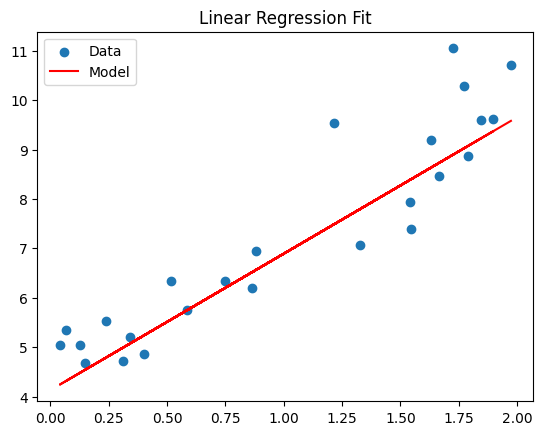

Learned coefficients (m):  2.76 (c):  4.131


In [23]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m): ", model.coef_,"(c): ", model.intercept_) # These coefficients show what's the slope and intercept
# In our synthetic data the slope=3 and intercept=4
# After running the custom class, the m & c should be near to actual 3&4.

## 📉 Plot the Loss Curve

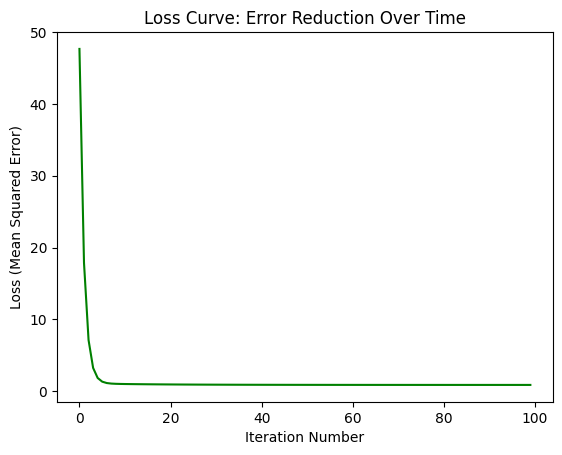

In [36]:
# Initialize and Train
model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Plotting the Loss Curve
plt.plot(range(len(model.loss_data)), model.loss_data, color='green')
plt.xlabel("Iteration Number")
plt.ylabel("Loss (Mean Squared Error)")
plt.title("Loss Curve: Error Reduction Over Time")
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [51]:
class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.coef_ = None
        self.intercept_ = None
        self.loss_dataSD = []

    def fit(self, X, y, lr=0.01, epochs=50):
        n_samples = len(y)

        self.loss_dataSD = []

        for epoch in range(epochs):   # epochs represent one complete pass of the entire training dataset throught the algorithm

            # Shuffle data at the start of each epoch for true randomness
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0

            for i in range(n_samples):
                xi = X_shuffled[i]
                yi = y_shuffled[i]

                # Predict for just THIS ONE sample
                y_guess = (self.m * xi) + self.c

                # Calculate squared error for this sample (for tracking)
                error = yi - y_guess
                epoch_loss += error**2

                # Calculate Gradients for THIS ONE sample
                # Based on our derivation: dm = -2 * x * (y - y_guess)
                # Note: We don't divide by N here because we are doing it per sample
                dm = -2 * xi * error
                dc = -2 * error

                # 5. Update Parameters immediately
                self.m -= (lr * dm)
                self.c -= (lr * dc)

            # Record average loss for the epoch
            self.loss_dataSD.append(epoch_loss / n_samples)

        self.coef_ = self.m
        self.intercept_ = self.c

    def predict(self, X):
        return (self.m * X.ravel()) + self.c

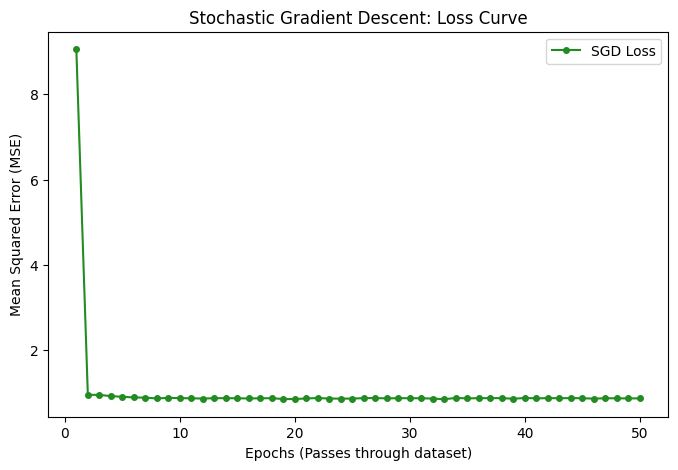

Final SGD Coefficients (m, c): [2.74189534], [4.19563289]


In [56]:
sgd_model = MyLinearRegressionSGD()
sgd_model.fit(X_train, y_train, lr=0.01, epochs=50)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sgd_model.loss_dataSD) + 1), sgd_model.loss_dataSD,
         color='forestgreen', marker='o', markersize=4, label='SGD Loss')

plt.title("Stochastic Gradient Descent: Loss Curve")
plt.xlabel("Epochs (Passes through dataset)")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()

print(f"Final SGD Coefficients (m, c): {sgd_model.coef_}, {sgd_model.intercept_}")

## Visualize the prediction result of Library version and Custom regression code created

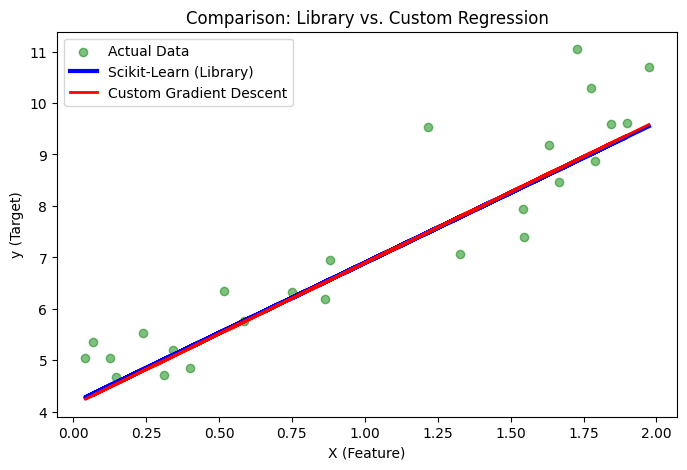

In [55]:
# Predictions for the test set
y_pred_sklearn = lr.predict(X_test)
y_pred_custom = model.predict(X_test)

# Create the visualization
plt.figure(figsize=(8, 5))

plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Actual Data') # Actual data points

plt.plot(X_test, y_pred_sklearn, color='blue', linewidth=3, label='Scikit-Learn (Library)') # Existing sklearn library

plt.plot(X_test, y_pred_custom, color='red', linewidth=2, label='Custom Gradient Descent') # Custom library

plt.title("Comparison: Library vs. Custom Regression")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.legend()
plt.show()


## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version